
<p style="font-family: 'Times New Roman', cursive, sans-serif; font-size: 22px;">
<b>Will it Snow Tomorrow?</b><br>
</p>


Importing Data and Required Packages

In [2]:
import os
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# Setting path to the service account key file
base_dir  = os.path.dirname(os.getcwd())
service_account_file = os.path.join(base_dir, 'snowforecasting-3fa3ec182f19.json')
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = service_account_file

In [4]:
#Initializing BigQuery client
bigquery_client = bigquery.Client()

Part 1

1. Task: Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010.

Define the SQL query and converting the results to DataFrame

In [5]:
query = """
    SELECT 
        FORMAT('%04d-%02d-%02d', year, month, day) AS date,       
        * 
    FROM 
        bigquery-public-data.samples.gsod
    WHERE 
        year BETWEEN 2005 AND 2009
        AND station_number BETWEEN 725300 AND 726300;
    
"""
query_output = bigquery_client.query(query)        

data_frame = query_output.to_dataframe()


Create the dataset folder

In [6]:
raw_path = os.path.join(base_dir,'data', 'raw', 'raw_data.csv' )
os.makedirs(os.path.dirname(raw_path),exist_ok=True)

Save the dataset

In [7]:
data_frame.to_csv(raw_path)

2. Task: From here you want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009.

Import the CSV Dataset as Pandas DataFrame

In [8]:
data_frame = pd.read_csv(raw_path,  low_memory=False, index_col=0)
data_frame

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2005-01-25,725940,99999,2005,1,25,51.299999,4,45.299999,4.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
1,2005-03-07,725940,99999,2005,3,7,51.500000,4,48.000000,4.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
2,2005-05-11,725940,99999,2005,5,11,51.000000,4,45.700001,4.0,...,NaN,NaN,0.01,NaN,False,False,False,False,False,False
3,2005-01-27,725869,99999,2005,1,27,30.200001,5,26.600000,5.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
4,2005-10-23,725827,99999,2005,10,23,55.000000,5,28.799999,5.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377779,2009-11-25,725975,24235,2009,11,25,50.799999,24,30.100000,24.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
377780,2009-11-28,725520,14935,2009,11,28,41.799999,24,27.200001,24.0,...,NaN,NaN,0.01,NaN,False,False,False,False,False,False
377781,2009-03-14,725660,24028,2009,3,14,36.700001,24,4.900000,24.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
377782,2009-02-22,725717,3016,2009,2,22,32.500000,24,18.100000,24.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False


Filter the dataset with station number 725300 to 725330

In [9]:
filtered_df = data_frame[(data_frame['station_number'] >= 725300) & (data_frame['station_number'] <= 725330)]
filtered_df.shape

(18129, 32)

2.1 Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate.

Dataset information

In [10]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18129 entries, 60 to 377772
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                18129 non-null  object 
 1   station_number                      18129 non-null  int64  
 2   wban_number                         18129 non-null  int64  
 3   year                                18129 non-null  int64  
 4   month                               18129 non-null  int64  
 5   day                                 18129 non-null  int64  
 6   mean_temp                           18129 non-null  float64
 7   num_mean_temp_samples               18129 non-null  int64  
 8   mean_dew_point                      18127 non-null  float64
 9   num_mean_dew_point_samples          18127 non-null  float64
 10  mean_sealevel_pressure              16291 non-null  float64
 11  num_mean_sealevel_pressure_samples  16291 no

Handling missing values

In [11]:
print(pd.DataFrame({'unique Values':filtered_df.nunique(),'Missing Values': filtered_df.isnull().sum(), 'Percentage': filtered_df.isnull().sum()*100/len(filtered_df)}))

                                    unique Values  Missing Values  Percentage
date                                         1824               0    0.000000
station_number                                 10               0    0.000000
wban_number                                    11               0    0.000000
year                                            5               0    0.000000
month                                          12               0    0.000000
day                                            31               0    0.000000
mean_temp                                     904               0    0.000000
num_mean_temp_samples                          21               0    0.000000
mean_dew_point                                877               2    0.011032
num_mean_dew_point_samples                     21               2    0.011032
mean_sealevel_pressure                        486            1838   10.138452
num_mean_sealevel_pressure_samples             21            183

Check columns with categorical features and numerical features

In [12]:
numerical_feature = [feature for feature in filtered_df.columns if filtered_df[feature].dtypes != 'O']
numerical_feature

['station_number',
 'wban_number',
 'year',
 'month',
 'day',
 'mean_temp',
 'num_mean_temp_samples',
 'mean_dew_point',
 'num_mean_dew_point_samples',
 'mean_sealevel_pressure',
 'num_mean_sealevel_pressure_samples',
 'mean_station_pressure',
 'num_mean_station_pressure_samples',
 'mean_visibility',
 'num_mean_visibility_samples',
 'mean_wind_speed',
 'num_mean_wind_speed_samples',
 'max_sustained_wind_speed',
 'max_gust_wind_speed',
 'max_temperature',
 'min_temperature',
 'min_temperature_explicit',
 'total_precipitation',
 'snow_depth',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'tornado']

In [13]:
categorical_feature  = [feature for feature in filtered_df.columns if filtered_df[feature].dtypes == 'O']
categorical_feature

['date', 'max_temperature_explicit']

Plot Histograms and Boxplot to Visualize the distribution and outliers of continuous features 

In [14]:
def visualize_num_columns(filtered_df, col_name):
    fig, ax = plt.subplots(1, 2, figsize = (12,5))
    sns.histplot(data = filtered_df, x = col_name, ax = ax[0], kde = True)
    sns.boxplot(data = filtered_df, x = col_name, ax = ax[1])
#visualize_num_columns(filtered_df, 'total_precipitation')

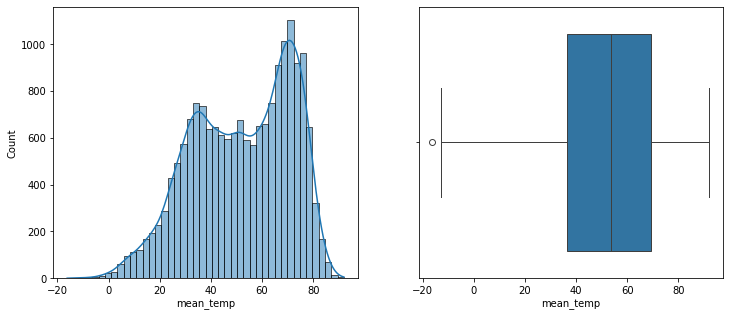

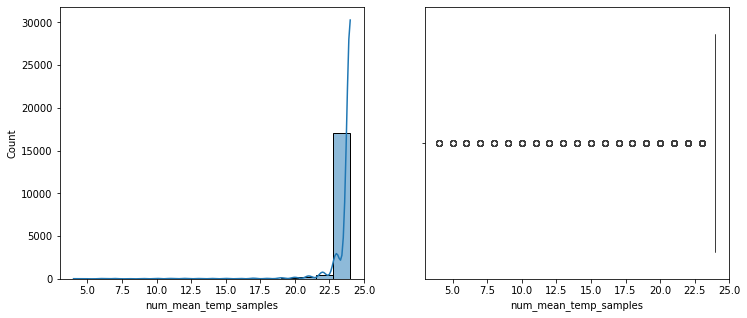

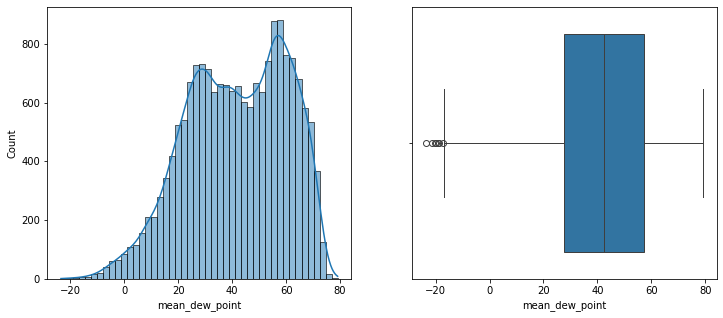

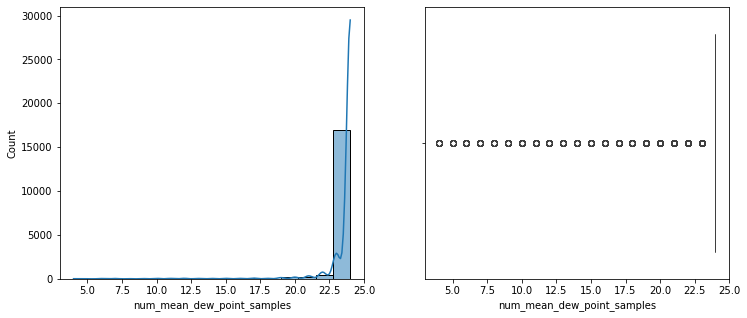

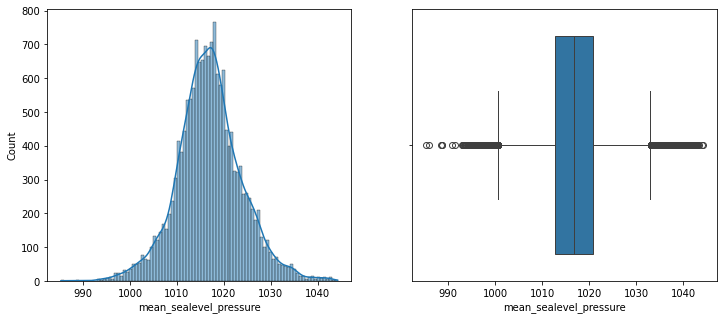

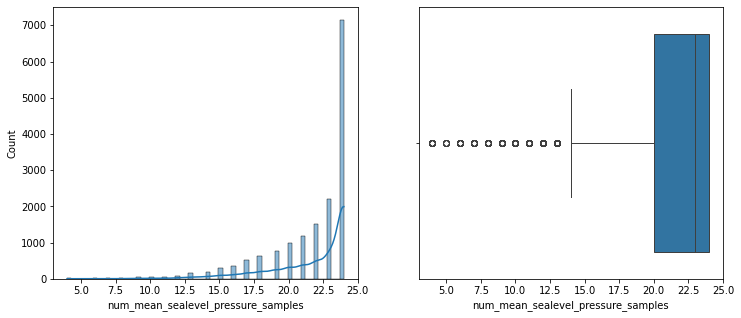

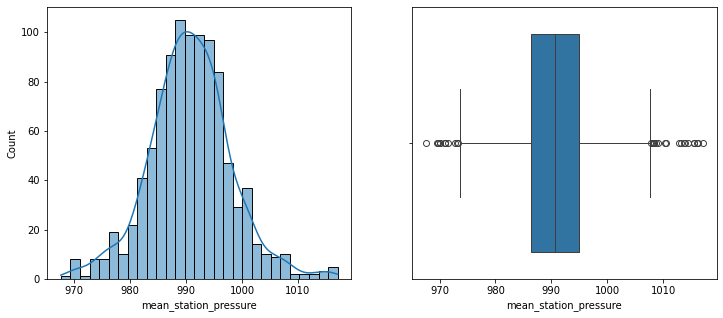

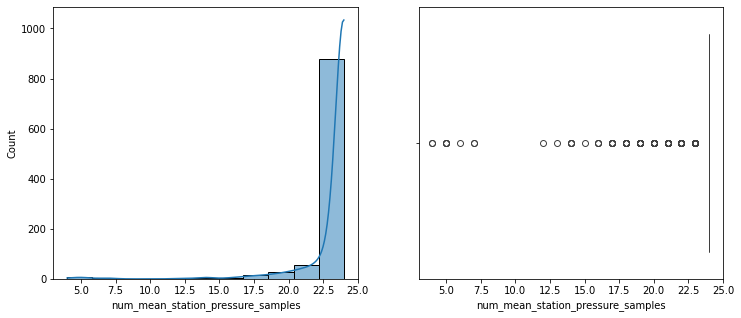

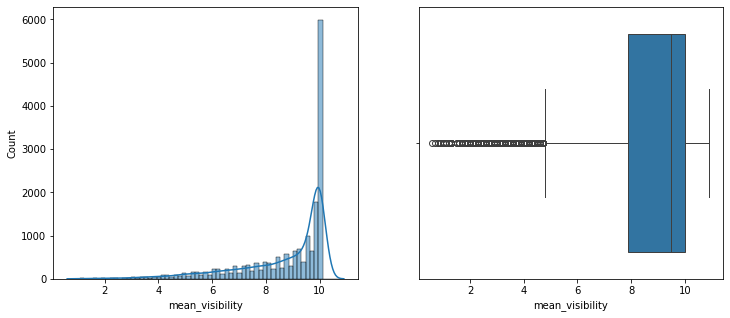

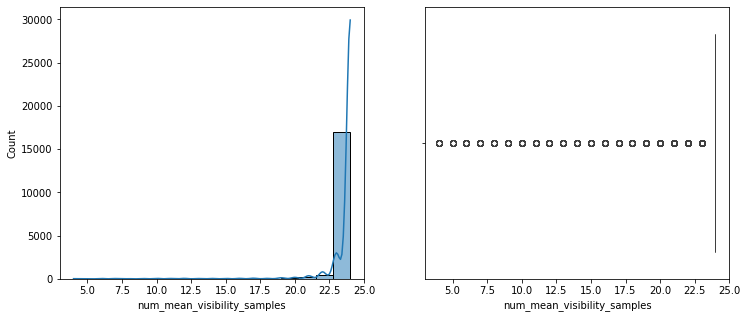

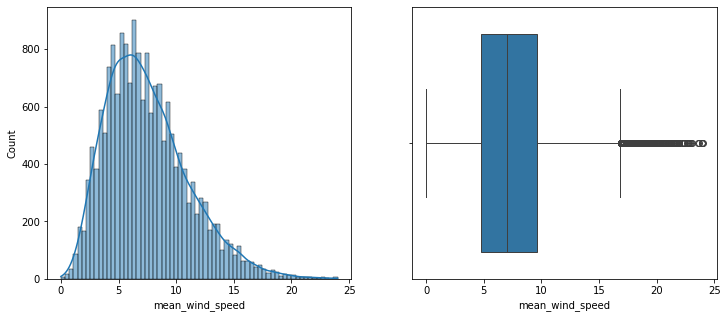

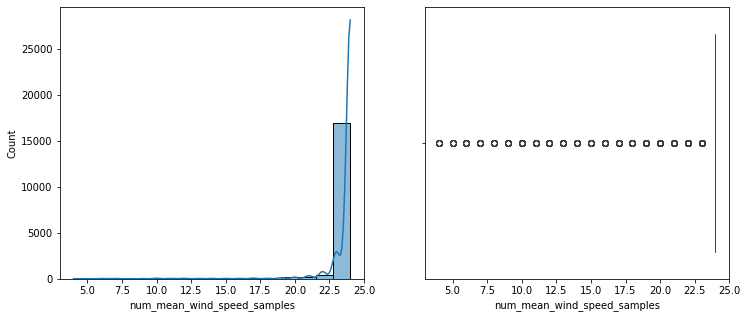

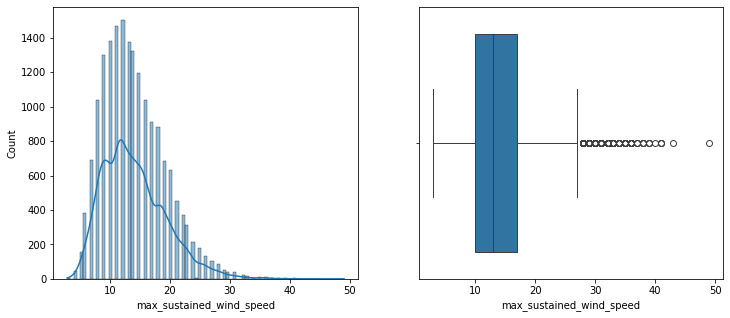

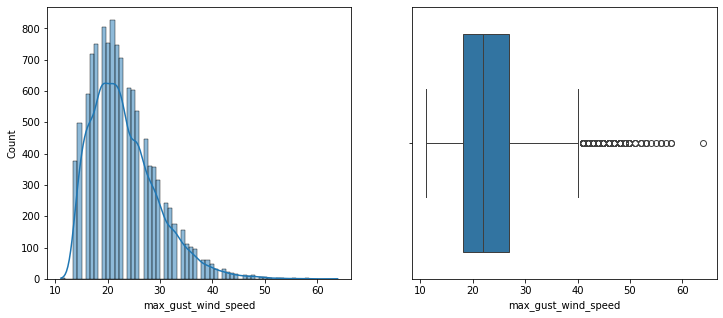

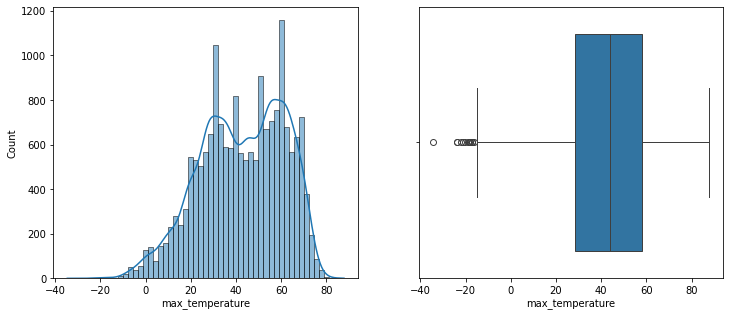

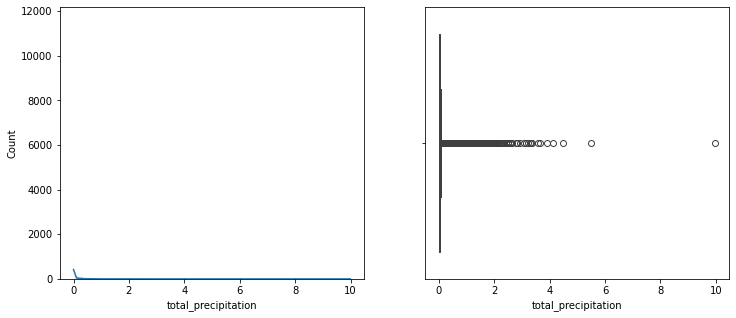

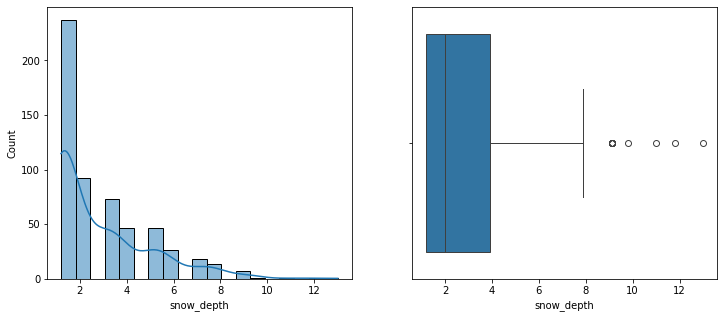

In [15]:
continuous_feature = [
       'mean_temp', 'num_mean_temp_samples', 'mean_dew_point',
       'num_mean_dew_point_samples', 'mean_sealevel_pressure',
       'num_mean_sealevel_pressure_samples', 'mean_station_pressure',
       'num_mean_station_pressure_samples', 'mean_visibility',
       'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'total_precipitation',
       'snow_depth']
for col in continuous_feature:
    visualize_num_columns(filtered_df, col)

Plot count plots for categorical features

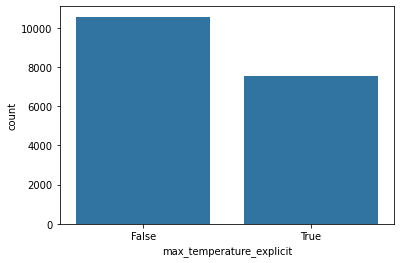

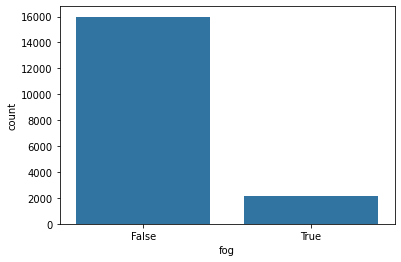

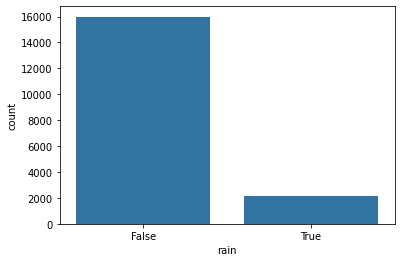

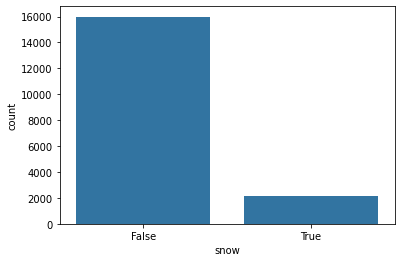

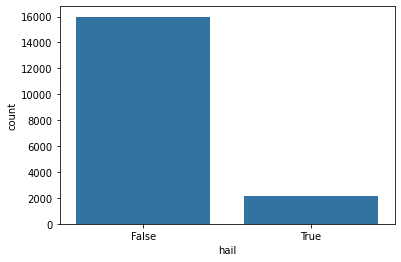

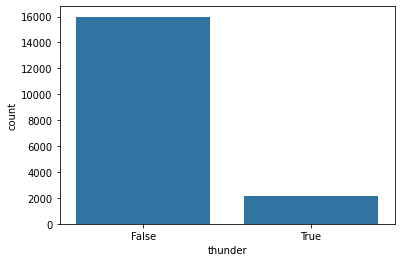

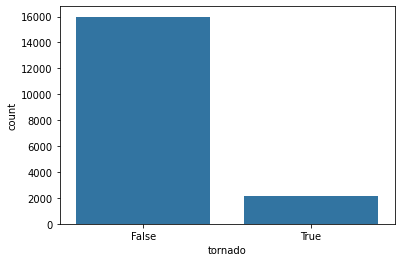

In [16]:
discrete_feature = [ 'max_temperature_explicit', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado']
for col in discrete_feature:
    sns.countplot(data = filtered_df, x = col)
    plt.show()

Plot correlation matrix to understand the relationship between all features

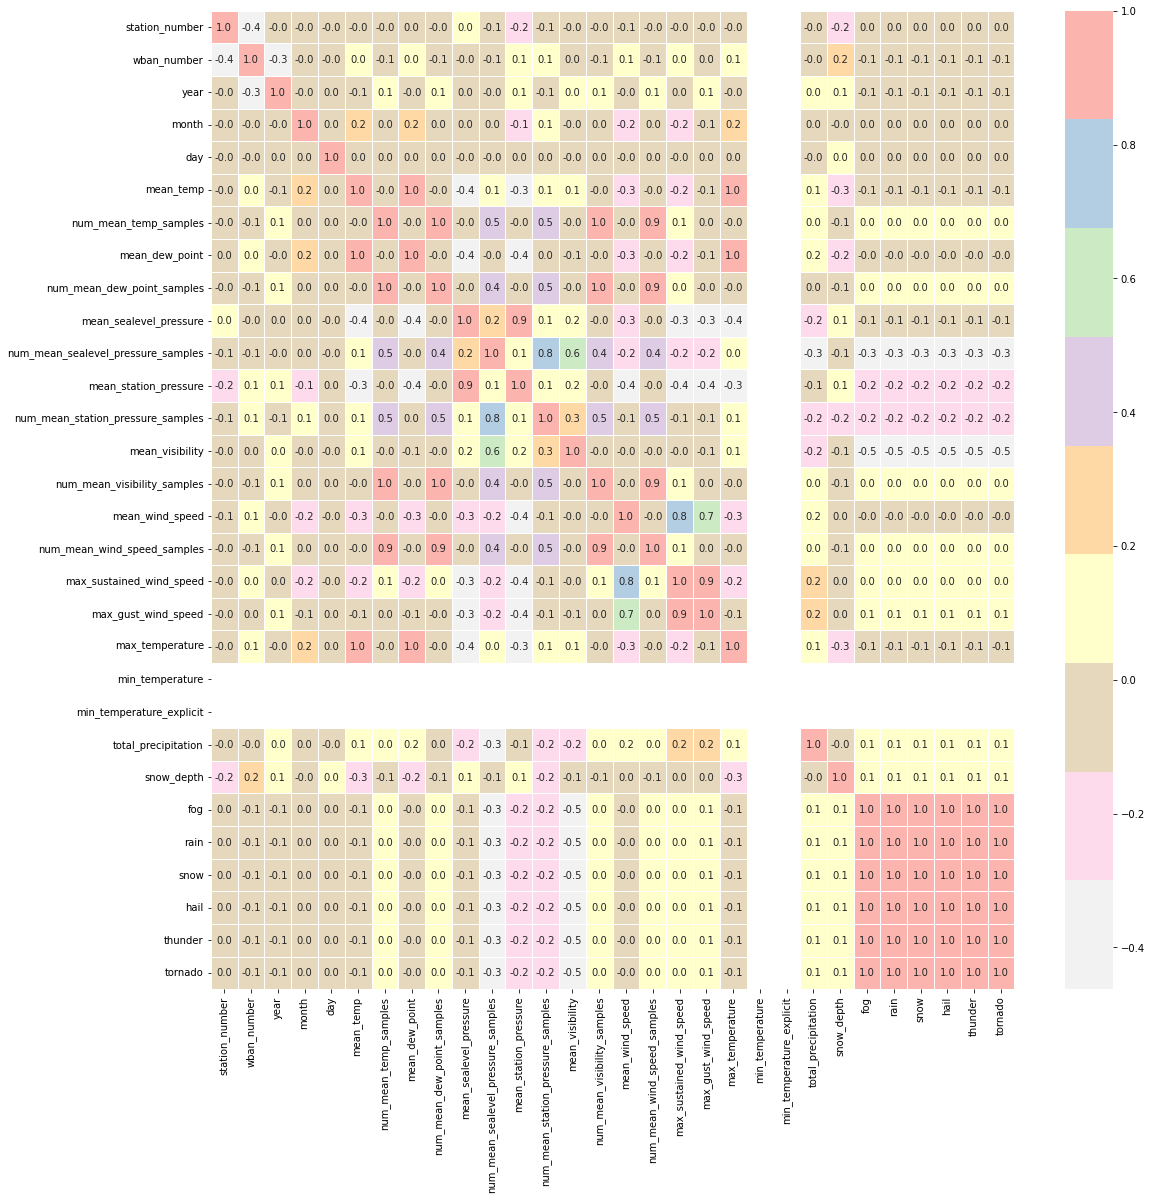

In [22]:
correlation_matrix = filtered_df.corr(numeric_only=True)
# Create a heatmap
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(correlation_matrix, cmap="Pastel1_r", annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

Feature Engineering

Binary encoding max_temperature_explicit

In [23]:
filtered_df['max_temperature_explicit'].value_counts()

max_temperature_explicit
False    10566
True      7561
Name: count, dtype: int64

Converting max_temperature_explicit strings to boolean values

In [24]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18129 entries, 60 to 377772
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                18129 non-null  object 
 1   station_number                      18129 non-null  int64  
 2   wban_number                         18129 non-null  int64  
 3   year                                18129 non-null  int64  
 4   month                               18129 non-null  int64  
 5   day                                 18129 non-null  int64  
 6   mean_temp                           18129 non-null  float64
 7   num_mean_temp_samples               18129 non-null  int64  
 8   mean_dew_point                      18127 non-null  float64
 9   num_mean_dew_point_samples          18127 non-null  float64
 10  mean_sealevel_pressure              16291 non-null  float64
 11  num_mean_sealevel_pressure_samples  16291 no

In [25]:
filtered_df.loc[:,'max_temperature_explicit_enc'] = filtered_df['max_temperature_explicit'].map({True: 1, False: 0})

<ipython-input-25-dae6aaae7127>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'max_temperature_explicit_enc'] = filtered_df['max_temperature_explicit'].map({True: 1, False: 0})


In [26]:
#Drop original 'max_temperature_explicit' column
filtered_df.drop('max_temperature_explicit', axis=1, inplace=True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18129 entries, 60 to 377772
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                18129 non-null  object 
 1   station_number                      18129 non-null  int64  
 2   wban_number                         18129 non-null  int64  
 3   year                                18129 non-null  int64  
 4   month                               18129 non-null  int64  
 5   day                                 18129 non-null  int64  
 6   mean_temp                           18129 non-null  float64
 7   num_mean_temp_samples               18129 non-null  int64  
 8   mean_dew_point                      18127 non-null  float64
 9   num_mean_dew_point_samples          18127 non-null  float64
 10  mean_sealevel_pressure              16291 non-null  float64
 11  num_mean_sealevel_pressure_samples  16291 no

<ipython-input-26-e1b27b2f0ed4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('max_temperature_explicit', axis=1, inplace=True)


Converting boolean columns to integers

In [27]:
boolean_columns  = filtered_df.select_dtypes('bool').columns
filtered_df[boolean_columns] = filtered_df[boolean_columns].astype(int)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18129 entries, 60 to 377772
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                18129 non-null  object 
 1   station_number                      18129 non-null  int64  
 2   wban_number                         18129 non-null  int64  
 3   year                                18129 non-null  int64  
 4   month                               18129 non-null  int64  
 5   day                                 18129 non-null  int64  
 6   mean_temp                           18129 non-null  float64
 7   num_mean_temp_samples               18129 non-null  int64  
 8   mean_dew_point                      18127 non-null  float64
 9   num_mean_dew_point_samples          18127 non-null  float64
 10  mean_sealevel_pressure              16291 non-null  float64
 11  num_mean_sealevel_pressure_samples  16291 no

<ipython-input-27-815b62e10e13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[boolean_columns] = filtered_df[boolean_columns].astype(int)


Deriving Datetime Features

In [28]:
#Convert the date column to datetime
filtered_df['date'] = pd.to_datetime(filtered_df['date'])


<ipython-input-28-acdc01edfd5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])


In [29]:
# Now extract day of year, month, and day of week
filtered_df.loc[:,'day_of_year'] = filtered_df['date'].dt.dayofyear
filtered_df.loc[:,'month'] = filtered_df['date'].dt.month
filtered_df.loc[:,'day_of_week'] = filtered_df['date'].dt.dayofweek

# Drop the original 'year' and 'day' feature
filtered_df = filtered_df.drop(columns=['year', 'day'])

<ipython-input-29-1714be5ca0b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'day_of_year'] = filtered_df['date'].dt.dayofyear
<ipython-input-29-1714be5ca0b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'day_of_week'] = filtered_df['date'].dt.dayofweek


In [30]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18129 entries, 60 to 377772
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                18129 non-null  datetime64[ns]
 1   station_number                      18129 non-null  int64         
 2   wban_number                         18129 non-null  int64         
 3   month                               18129 non-null  int64         
 4   mean_temp                           18129 non-null  float64       
 5   num_mean_temp_samples               18129 non-null  int64         
 6   mean_dew_point                      18127 non-null  float64       
 7   num_mean_dew_point_samples          18127 non-null  float64       
 8   mean_sealevel_pressure              16291 non-null  float64       
 9   num_mean_sealevel_pressure_samples  16291 non-null  float64       
 10  mean_station_pressure    

Dropping non-informative columns, features with perfect correlation  and with high proportion of missing values

In [31]:
filtered_df.isnull().sum()*100/len(filtered_df)

date                                    0.000000
station_number                          0.000000
wban_number                             0.000000
month                                   0.000000
mean_temp                               0.000000
num_mean_temp_samples                   0.000000
mean_dew_point                          0.011032
num_mean_dew_point_samples              0.011032
mean_sealevel_pressure                 10.138452
num_mean_sealevel_pressure_samples     10.138452
mean_station_pressure                  94.522588
num_mean_station_pressure_samples      94.522588
mean_visibility                         0.016548
num_mean_visibility_samples             0.016548
mean_wind_speed                         0.027580
num_mean_wind_speed_samples             0.027580
max_sustained_wind_speed                0.055160
max_gust_wind_speed                    36.742236
max_temperature                         0.011032
min_temperature                       100.000000
min_temperature_expl

In [32]:
columns_to_drop = ['wban_number',
                   'mean_station_pressure', 
                   'num_mean_station_pressure_samples',   
                   'num_mean_temp_samples',
                   'num_mean_dew_point_samples',
                   'num_mean_sealevel_pressure_samples',
                   'num_mean_visibility_samples',
                   'num_mean_wind_speed_samples', 
                   'min_temperature_explicit',
                   'min_temperature',
                   'snow_depth',
                   'max_gust_wind_speed',
                   'fog',
                   'rain',
                   'hail',
                   'thunder',
                   'tornado'
                     ]
df_new = filtered_df.drop(columns = columns_to_drop, axis= 1)

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18129 entries, 60 to 377772
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          18129 non-null  datetime64[ns]
 1   station_number                18129 non-null  int64         
 2   month                         18129 non-null  int64         
 3   mean_temp                     18129 non-null  float64       
 4   mean_dew_point                18127 non-null  float64       
 5   mean_sealevel_pressure        16291 non-null  float64       
 6   mean_visibility               18126 non-null  float64       
 7   mean_wind_speed               18124 non-null  float64       
 8   max_sustained_wind_speed      18119 non-null  float64       
 9   max_temperature               18127 non-null  float64       
 10  total_precipitation           17938 non-null  float64       
 11  snow                          1

In [34]:
df_new.isnull().sum()*100/len(df_new)

date                             0.000000
station_number                   0.000000
month                            0.000000
mean_temp                        0.000000
mean_dew_point                   0.011032
mean_sealevel_pressure          10.138452
mean_visibility                  0.016548
mean_wind_speed                  0.027580
max_sustained_wind_speed         0.055160
max_temperature                  0.011032
total_precipitation              1.053561
snow                             0.000000
max_temperature_explicit_enc     0.011032
day_of_year                      0.000000
day_of_week                      0.000000
dtype: float64

Save the processed dataset

In [35]:
processed_path = os.path.join(base_dir,'data', 'processed', 'processed_data.csv' )
os.makedirs(os.path.dirname(processed_path),exist_ok=True)
df_new.to_csv(processed_path)

3. Task: Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

Get the target date

In [36]:

target_date = (dt.datetime.today() - dt.timedelta(days=15*365)).strftime('%Y-%m-%d')
target_date

'2009-07-20'

Filter the test data based on the target date

In [37]:
test_data = df_new[df_new['date'] >= target_date]
test_data['snow'].value_counts()

snow
0    1449
1     181
Name: count, dtype: int64

Save the test dataset

In [38]:
test_data_path = os.path.join(base_dir,'data', 'artifacts', 'test_data.csv' )
os.makedirs(os.path.dirname(test_data_path),exist_ok=True)
test_data.set_index('date', inplace=True)
test_data.to_csv(test_data_path)

Sort the dataset by date  and filter to include only dates before the target date

In [39]:
df_new = df_new.sort_values(by = 'date')
train_val_df = df_new[df_new['date'] < target_date]
train_val_df

,date,station_number,month,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_temperature,total_precipitation,snow,max_temperature_explicit_enc,day_of_year,day_of_week
206868,2005-01-01,725326,1,29.400000,20.100000,NaN,10.0,9.7,18.1,21.200001,0.00,0,0.0,1,5
76172,2005-01-01,725320,1,35.299999,26.700001,1026.099976,7.6,9.3,14.0,30.000000,0.38,1,0.0,1,5
72589,2005-01-01,725300,1,32.099998,21.200001,1027.800049,9.9,8.7,14.0,24.799999,0.00,0,1.0,1,5
92491,2005-01-01,725330,1,38.400002,32.599998,1027.800049,9.2,7.9,15.9,30.000000,0.08,1,0.0,1,5
190375,2005-01-01,725317,1,48.599998,46.000000,1025.400024,4.8,7.0,13.0,41.000000,0.03,1,0.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199471,2009-07-19,725305,7,65.500000,53.799999,1019.400024,10.0,3.0,8.9,57.900002,0.00,0,0.0,200,6
120690,2009-07-19,725327,7,62.799999,55.500000,1019.700012,9.8,2.0,7.0,55.400002,0.00,0,1.0,200,6
41866,2009-07-19,725317,7,65.599998,55.200001,1019.799988,10.0,4.3,7.0,57.200001,0.00,0,1.0,200,6
205967,2009-07-19,725315,7,64.800003,55.900002,1020.099976,10.0,3.1,6.0,57.000000,0.00,0,0.0,200,6


In [40]:
# Display the date range of the filtered data
print(f"Filtered data range: {train_val_df['date'].min()} to {train_val_df['date'].max()}")

Filtered data range: 2005-01-01 00:00:00 to 2009-07-19 00:00:00


Split the dataset into train and validation

In [41]:
# Calculate the index for the 80-20 split
split_index = int(len(train_val_df) * 0.8)
# Split the filtered dataset
train_data = train_val_df.iloc[:split_index]
val_data = train_val_df.iloc[split_index:]

In [42]:
# Display the date ranges of the training and validation sets
print(f"Training data range: {train_data['date'].min()} to {train_data['date'].max()}")
print(f"Validation data range: {val_data['date'].min()} to {val_data['date'].max()}")

Training data range: 2005-01-01 00:00:00 to 2008-08-22 00:00:00
Validation data range: 2008-08-22 00:00:00 to 2009-07-19 00:00:00


In [43]:
# Verify the number of records in each set
print(f"Number of records in training set: {len(train_data)}")
print(f"Number of records in validation set: {len(val_data)}")


Number of records in training set: 13199
Number of records in validation set: 3300


Save the train and validation dataset

In [44]:
train_data_path = os.path.join(base_dir,'data', 'artifacts', 'train_data.csv' )
os.makedirs(os.path.dirname(train_data_path),exist_ok=True)
train_data.set_index('date', inplace=True)
train_data.to_csv(train_data_path)


In [45]:
val_data_path = os.path.join(base_dir,'data', 'artifacts', 'val_data.csv' )
os.makedirs(os.path.dirname(val_data_path),exist_ok=True)
val_data.set_index('date', inplace=True)
val_data.to_csv(val_data_path)